In [1]:
import pandas as pd
import warnings
import sys
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler,OneHotEncoder

In [2]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
data=pd.read_csv('../Datos/datos_balanceados_sm.csv')
datos=data.drop('Unnamed: 0',axis=1)
datos


,Mora,Motivo salida_despido,Motivo salida_pensión,Motivo salida_renuncia,Linea de Credito_Libre Inversion,Linea de Credito_Vehículo,Linea de Credito_Vivienda,Estado Crediticio_Reestructurado,Estado Crediticio_Vigente,Valor crédito,...,edad,endeudameinto,antigüedad cuando otorgaron el crédito,tiempo trabajado,tasa,cuota total,Cuentas x Cobrar,Provisión General,cargo,Calif. Ope. Sup. Act.
0,0,1.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.206931,...,1.000000,0.074152,0.605351,0.618226,0.246914,0.120351,0.039568,0.085740,2.000000,0.0
1,0,0.000000,0.000000,1.000000,0.0,0.0,1.0,0.0,1.0,0.130693,...,0.568241,0.002578,1.000000,1.000000,0.246914,0.089440,0.002569,0.149271,0.000000,0.0
2,0,0.000000,1.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.039406,...,0.753014,0.107170,0.902596,0.916205,0.455247,0.090916,0.000904,0.000000,6.000000,0.0
3,0,0.000000,0.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.039604,...,0.578299,0.085690,0.891823,0.903327,0.455247,0.154852,0.000597,0.000000,6.000000,0.0
4,0,0.000000,1.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.623762,...,0.759941,0.071590,0.861445,0.928635,0.246914,0.429738,0.000000,0.595465,2.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1,0.893789,0.000000,0.106211,0.0,0.0,1.0,0.0,1.0,0.268967,...,0.260129,0.033895,0.066435,0.063440,0.246914,0.164893,0.005250,0.152420,5.787578,0.0
258,1,0.565572,0.000000,0.434428,0.0,0.0,1.0,0.0,1.0,0.293134,...,0.149244,0.056320,0.051729,0.042075,0.246914,0.190516,0.007908,0.228898,6.000000,0.0
259,1,0.000000,0.389899,0.610101,0.0,0.0,1.0,0.0,1.0,0.261309,...,0.601213,0.050904,0.511046,0.573880,0.246914,0.156250,0.003495,0.124992,4.779798,0.0
260,1,1.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.604738,...,0.532200,0.138030,0.077685,0.291317,0.246914,0.387661,0.008765,0.401515,8.840806,0.0


In [4]:
X=datos.drop('Mora',axis=1)
Y=datos['Mora']

In [5]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
X_train

,Motivo salida_despido,Motivo salida_pensión,Motivo salida_renuncia,Linea de Credito_Libre Inversion,Linea de Credito_Vehículo,Linea de Credito_Vivienda,Estado Crediticio_Reestructurado,Estado Crediticio_Vigente,Valor crédito,Plazo crédito,...,edad,endeudameinto,antigüedad cuando otorgaron el crédito,tiempo trabajado,tasa,cuota total,Cuentas x Cobrar,Provisión General,cargo,Calif. Ope. Sup. Act.
101,0.0,0.0,1.0,1.0,0.00000,0.00000,0.0,1.0,0.033663,0.000000,...,0.155732,0.063120,0.053603,0.077714,0.913580,0.147486,0.000548,0.000000,2.000000,0.000000
16,0.0,1.0,0.0,0.0,0.00000,1.00000,0.0,1.0,0.103960,1.000000,...,0.790382,0.026052,0.454521,0.528349,0.246914,0.060455,0.028496,0.060758,7.000000,0.000000
106,0.0,0.0,1.0,0.0,0.00000,1.00000,0.0,1.0,0.679703,1.000000,...,0.400586,0.228808,0.049982,0.069755,0.246914,0.465430,0.094723,0.628281,3.000000,0.000000
75,0.0,0.0,1.0,1.0,0.00000,0.00000,0.0,1.0,0.009901,0.000000,...,0.453474,0.221397,0.079212,0.093722,0.913580,0.072088,0.000234,0.000000,5.000000,0.000000
255,1.0,0.0,0.0,0.0,0.00000,1.00000,0.0,1.0,0.593309,1.000000,...,0.652326,0.373729,0.041380,0.217466,0.105468,0.344715,0.372940,0.384571,8.427144,2.291425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1.0,0.0,0.0,0.0,0.00000,1.00000,1.0,0.0,0.284939,1.000000,...,0.483657,0.090660,0.303278,0.320707,0.132368,0.170426,0.203242,0.209686,3.855638,3.463910
192,1.0,0.0,0.0,0.0,0.96545,0.03455,0.0,1.0,0.050317,0.215571,...,0.532163,0.024907,0.028164,0.042491,0.448049,0.088198,0.000255,0.003590,2.138198,0.000000
117,1.0,0.0,0.0,0.0,0.00000,1.00000,0.0,1.0,0.123203,1.000000,...,0.439952,0.036685,0.033292,0.207297,0.246914,0.069294,0.000878,0.051057,6.000000,0.000000
47,1.0,0.0,0.0,0.0,0.00000,1.00000,0.0,1.0,0.265347,1.000000,...,0.475854,0.008285,0.119216,0.295833,0.246914,0.162123,0.002562,0.147487,6.000000,0.000000


In [6]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance


parametros = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-4, 4, 10),
    "max_iter": [1000, 2000, 5000],
}
RL = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear',random_state=0),
    param_grid=parametros,
    scoring="recall",
    cv=10,
    n_jobs=-1,
)

flujo_logistica= Pipeline(
    [
        ("Modelo",RL),
         
    ]
)
flujo_logistica.fit(X_train,Y_train.ravel())

Pipeline(steps=[('Modelo',
                 GridSearchCV(cv=10,
                              estimator=LogisticRegression(random_state=0,
                                                           solver='liblinear'),
                              n_jobs=-1,
                              param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                          'max_iter': [1000, 2000, 5000],
                                          'penalty': ['l1', 'l2']},
                              scoring='recall'))])

In [7]:
from tabulate import tabulate

modelo_RL=flujo_logistica["Modelo"]

tabla = [
    ["C", modelo_RL.best_params_["C"] ],
    ["Max_iter",modelo_RL.best_params_["max_iter"]],
    ["penalty",modelo_RL.best_params_["penalty"]],
    ["Recall entrenamiento",flujo_logistica.score(X_train,Y_train)],
    ["Recall test",flujo_logistica.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒══════════════════════╤════════════════════╕
│ C                    │ 1291.5496650148827 │
├──────────────────────┼────────────────────┤
│ Max_iter             │ 1000               │
├──────────────────────┼────────────────────┤
│ penalty              │ l1                 │
├──────────────────────┼────────────────────┤
│ Recall entrenamiento │ 0.7349397590361446 │
├──────────────────────┼────────────────────┤
│ Recall test          │ 0.75               │
╘══════════════════════╧════════════════════╛


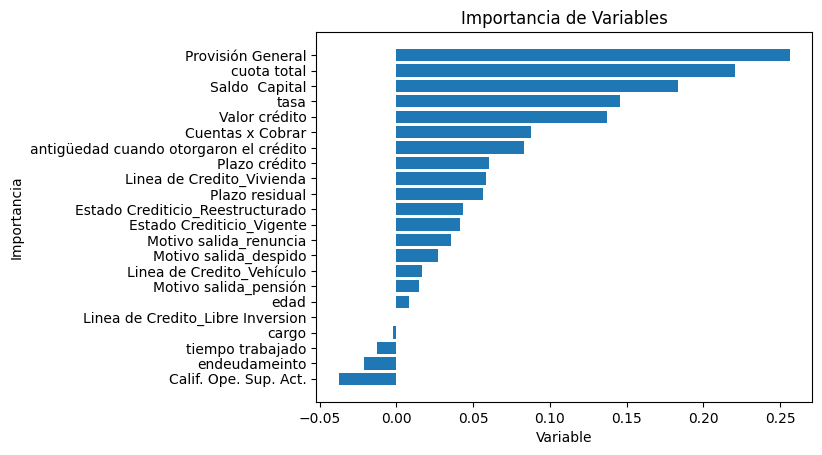

In [8]:
results = permutation_importance(
    flujo_logistica, X_test, Y_test, scoring="recall", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

In [9]:
from sklearn.naive_bayes import GaussianNB
parametros = {'var_smoothing': np.linspace(0.001, 1, 10)}  


NB = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=parametros,
    scoring="recall",
    cv=10,
    n_jobs=-1,
)

flujo_NB= Pipeline(
    [
        ("Modelo",NB),
         
    ]
)
flujo_NB.fit(X_train,Y_train.ravel())

Pipeline(steps=[('Modelo',
                 GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
                              param_grid={'var_smoothing': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ])},
                              scoring='recall'))])

In [10]:
modelo_NB=flujo_NB["Modelo"]

tabla = [
    ["var_smoothing", modelo_NB.best_params_["var_smoothing"] ],


    ["Recall entrenamiento",flujo_NB.score(X_train,Y_train)],
    ["Recall test",flujo_NB.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒══════════════════════╤══════════╕
│ var_smoothing        │ 0.001    │
├──────────────────────┼──────────┤
│ Recall entrenamiento │ 0.698795 │
├──────────────────────┼──────────┤
│ Recall test          │ 0.708333 │
╘══════════════════════╧══════════╛


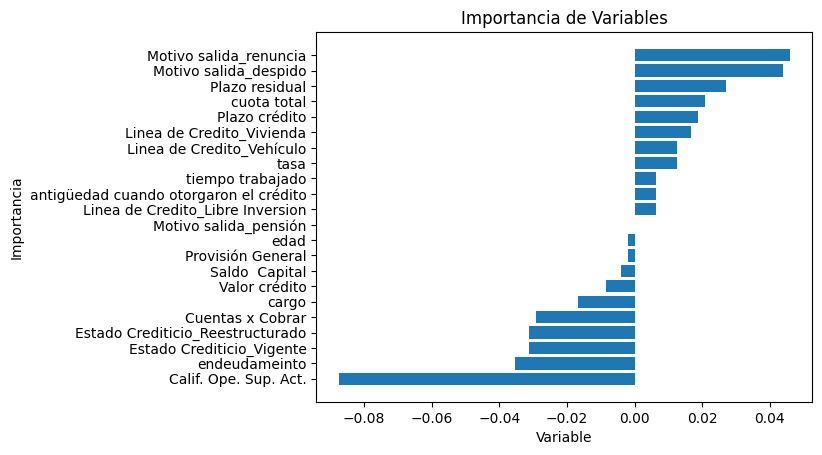

In [11]:
results = permutation_importance(
    flujo_NB, X_test, Y_test, scoring="recall", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X_test.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X_test.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier


parametros =  {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    "min_samples_split": [2, 5, 10,20,50],
    "min_samples_leaf": [1, 2, 5,10,20],

} 


AC = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=parametros,
    scoring="recall",
    cv=10,
    n_jobs=-1,
)

flujo_AC= Pipeline(
    [
   
        ("Modelo",AC),
         
    ]
)

flujo_AC.fit(X_train,Y_train)

Pipeline(steps=[('Modelo',
                 GridSearchCV(cv=10,
                              estimator=DecisionTreeClassifier(random_state=0),
                              n_jobs=-1,
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23],
                                          'min_samples_leaf': [1, 2, 5, 10, 20],
                                          'min_samples_split': [2, 5, 10, 20,
                                                                50]},
                              scoring='recall'))])

In [13]:
modelo_AC=flujo_AC["Modelo"]

tabla = [
    ["criterion", modelo_AC.best_params_["criterion"] ],
    ["max_depth", modelo_AC.best_params_["max_depth"] ],
    ["min_samples_split", modelo_AC.best_params_["min_samples_split"] ],
    ["min_samples_leaf", modelo_AC.best_params_["min_samples_leaf"] ],

    ["Recall entrenamiento",flujo_AC.score(X_train,Y_train)],
    ["Recall test",flujo_AC.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒══════════════════════╤════════════════════╕
│ criterion            │ gini               │
├──────────────────────┼────────────────────┤
│ max_depth            │ 4                  │
├──────────────────────┼────────────────────┤
│ min_samples_split    │ 2                  │
├──────────────────────┼────────────────────┤
│ min_samples_leaf     │ 1                  │
├──────────────────────┼────────────────────┤
│ Recall entrenamiento │ 0.9759036144578314 │
├──────────────────────┼────────────────────┤
│ Recall test          │ 0.8541666666666666 │
╘══════════════════════╧════════════════════╛


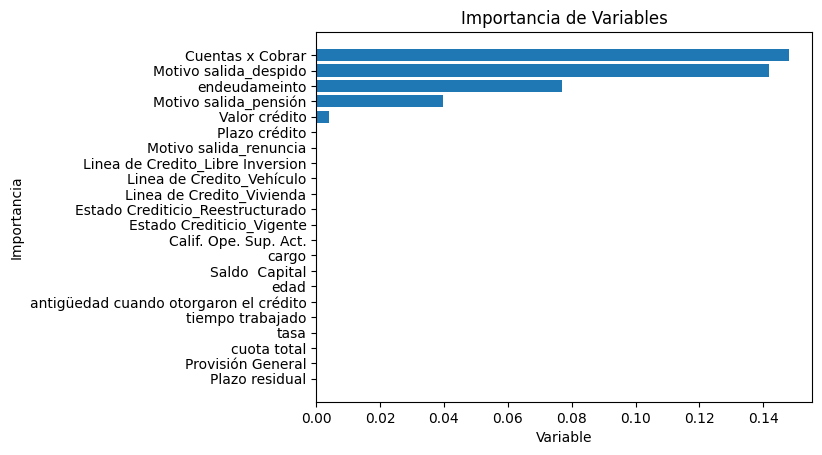

In [14]:
results = permutation_importance(
    flujo_AC, X_test, Y_test, scoring="recall", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X_test.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X_test.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

In [15]:

%%capture
from sklearn.ensemble import RandomForestClassifier


parametros =  {
    'criterion':['gini', 'entropy'],
    "n_estimators": [100, 200, 300],  # Número de árboles
    "max_depth": [2, 4, 6,8,10],          # Profundidad máxima de los árboles
    "min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4],    # Mínimo de muestras en una hoja final
}


RF= GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=parametros,
    scoring="recall",
    cv=10,
    n_jobs=-1,
)

flujo_RF= Pipeline(
    [
       # ("Preprocesamiento", preprocessing),
        ("Modelo",RF),
         
    ]
)

flujo_RF.fit(X_train,Y_train.ravel())

In [16]:
modelo_RF=flujo_RF["Modelo"]

tabla = [
    ["criterion", modelo_RF.best_params_["criterion"] ],
    ["max_depth", modelo_RF.best_params_["max_depth"] ],
    ["min_samples_split", modelo_RF.best_params_["min_samples_split"] ],
    ["min_samples_leaf", modelo_RF.best_params_["min_samples_leaf"] ],

    ["Recall entrenamiento",flujo_RF.score(X_train,Y_train)],
    ["Recall test",flujo_RF.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒══════════════════════╤════════════════════╕
│ criterion            │ gini               │
├──────────────────────┼────────────────────┤
│ max_depth            │ 6                  │
├──────────────────────┼────────────────────┤
│ min_samples_split    │ 2                  │
├──────────────────────┼────────────────────┤
│ min_samples_leaf     │ 1                  │
├──────────────────────┼────────────────────┤
│ Recall entrenamiento │ 1.0                │
├──────────────────────┼────────────────────┤
│ Recall test          │ 0.9791666666666666 │
╘══════════════════════╧════════════════════╛


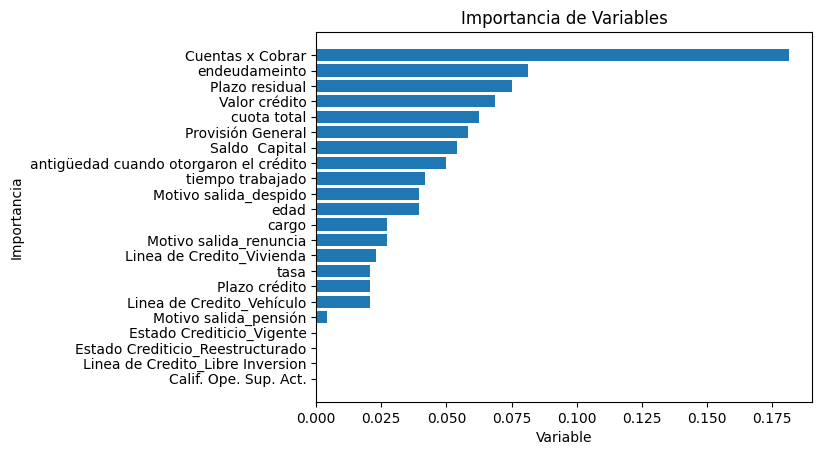

In [17]:
results = permutation_importance(
    flujo_RF, X_test, Y_test, scoring="recall", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X_test.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X_test.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

parametros =  {
   
    "C": np.logspace(-3, 3, 10),
    "gamma": np.logspace(-3, 3, 10),
    "kernel": ["rbf"]
}


MSV = RandomizedSearchCV(estimator=SVC(random_state=0), 
                         param_distributions=parametros, 
                             scoring="recall",

                         n_iter=100, cv=10)

flujo_MSV= Pipeline(
    [
        #("Preprocesamiento", preprocessing),
        ("Modelo",MSV),
         
    ]
)

flujo_MSV.fit(X_train,Y_train)

Pipeline(steps=[('Modelo',
                 RandomizedSearchCV(cv=10, estimator=SVC(random_state=0),
                                    n_iter=100,
                                    param_distributions={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                                         'gamma': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                                         'kernel': ['rbf']},
                                    scoring='recall'))])

In [19]:
modelo_SV=flujo_MSV["Modelo"]

tabla = [
    ["C", modelo_SV.best_params_["C"] ],
    ["gamma", modelo_SV.best_params_["gamma"] ],
    ["kernel", modelo_SV.best_params_["kernel"] ],
   

    ["Recall entrenamiento",flujo_MSV.score(X_train,Y_train)],
    ["Recall test",flujo_MSV.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒══════════════════════╤════════════════════╕
│ C                    │ 1000.0             │
├──────────────────────┼────────────────────┤
│ gamma                │ 0.1                │
├──────────────────────┼────────────────────┤
│ kernel               │ rbf                │
├──────────────────────┼────────────────────┤
│ Recall entrenamiento │ 0.8674698795180723 │
├──────────────────────┼────────────────────┤
│ Recall test          │ 0.9166666666666666 │
╘══════════════════════╧════════════════════╛


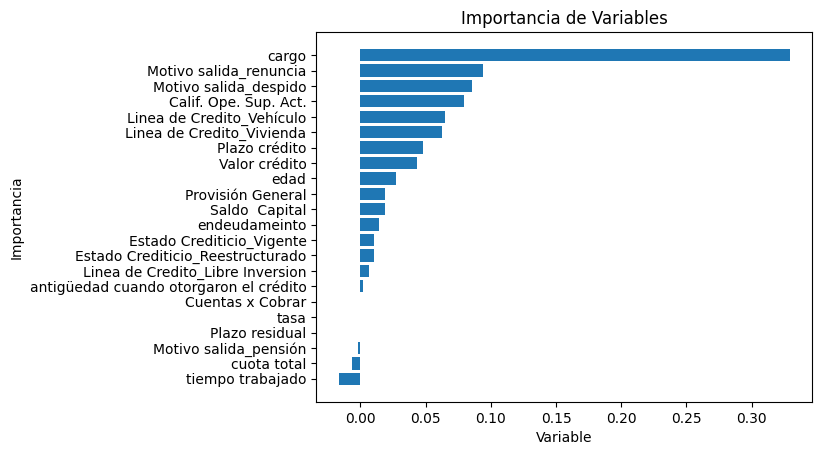

In [20]:
results = permutation_importance(
    flujo_MSV, X_test, Y_test, scoring="recall", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X_test.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X_test.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

In [21]:
from xgboost import XGBClassifier

parametros =   {
  'learning_rate': [0.01,0.05, 0.1, 0.3],  # Tasa de aprendizaje
  'max_depth': [3, 5, 8,10,15],           # Profundidad máxima de los árboles
  'n_estimators': [100, 200, 300],  # Número de árboles
  'min_child_weight': [1, 3, 5],     # Peso mínimo de los nodos hijos
  'gamma': [0, 0.1, 0.3],            # Control de crecimiento del árbol
}



XB = RandomizedSearchCV(estimator=XGBClassifier(objective='binary:logistic',random_state=0), 
                         param_distributions=parametros, 
                             scoring="recall",
                         n_iter=100, cv=10)

flujo_XB= Pipeline(
    [
        #("Preprocesamiento", preprocessing),
        ("Modelo",XB),
         
    ]
)

flujo_XB.fit(X_train,Y_train)

Pipeline(steps=[('Modelo',
                 RandomizedSearchCV(cv=10,
                                    estimator=XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,
                                                            importance_type=None,
                                                            interaction_con...
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=0, ...),
                                    n_iter=100,
                                    param_distributions={'gamma': [0, 0.1, 0.3],
                                                         'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.3],
                                                         'max_depth': [3, 5, 8,
                                                                       10, 15],
                                                         'min_child_weight': [1,
                                                                              3,
                                                                              5],
                                                         'n_estimators': [100,
                                                                          200,
                                                                          300]},
                                    scoring='recall'))])

In [22]:
modelo_XB=flujo_XB["Modelo"]

tabla = [
    ["learning_rate", modelo_XB.best_params_["learning_rate"] ],
    ["max_depth", modelo_XB.best_params_["max_depth"] ],
    ["n_estimators", modelo_XB.best_params_["n_estimators"] ],
    ["min_child_weight", modelo_XB.best_params_["min_child_weight"] ],
    ["gamma", modelo_XB.best_params_["gamma"] ],
    ["Recall entrenamiento",flujo_XB.score(X_train,Y_train)],
    ["Recall test",flujo_XB.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒══════════════════════╤════════════╕
│ learning_rate        │   0.3      │
├──────────────────────┼────────────┤
│ max_depth            │  10        │
├──────────────────────┼────────────┤
│ n_estimators         │ 300        │
├──────────────────────┼────────────┤
│ min_child_weight     │   1        │
├──────────────────────┼────────────┤
│ gamma                │   0.1      │
├──────────────────────┼────────────┤
│ Recall entrenamiento │   1        │
├──────────────────────┼────────────┤
│ Recall test          │   0.895833 │
╘══════════════════════╧════════════╛


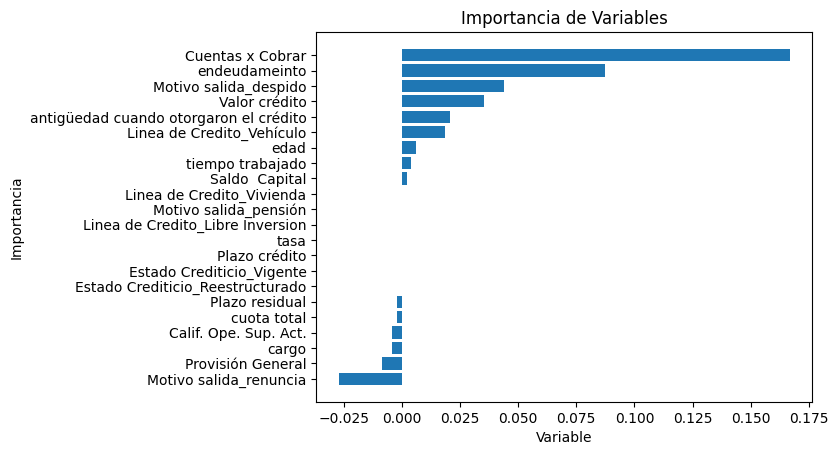

In [23]:
results = permutation_importance(
    flujo_XB, X_test, Y_test, scoring="recall", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X_test.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X_test.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

## Resultados

Para la seleccion del modelo se decide utilizar el  recall, porque es una métrica crucial cuando la identificación correcta de todos los casos positivos es de suma importancia, especialmente cuando los costes de los falsos negativos son elevados o cuando la clase positiva es minoritaria.

In [24]:
tabla = [
    ["Modelo", "Recall"],
    ["Regresion logistica",flujo_logistica.score(X_test,Y_test)],
    ["Naive Bayes",flujo_NB.score(X_test,Y_test)],
    ["Maquina de soporte vectorial",flujo_MSV.score(X_test,Y_test)],
    ["Arbol de Clasificacion",flujo_AC.score(X_test,Y_test)],
    ["Ramdon Forest",flujo_RF.score(X_test,Y_test)],
    ["Xgboots",flujo_XB.score(X_test,Y_test)]

    ]

print(tabulate(tabla, tablefmt="fancy_grid"))

╒══════════════════════════════╤════════════════════╕
│ Modelo                       │ Recall             │
├──────────────────────────────┼────────────────────┤
│ Regresion logistica          │ 0.75               │
├──────────────────────────────┼────────────────────┤
│ Naive Bayes                  │ 0.7083333333333334 │
├──────────────────────────────┼────────────────────┤
│ Maquina de soporte vectorial │ 0.9166666666666666 │
├──────────────────────────────┼────────────────────┤
│ Arbol de Clasificacion       │ 0.8541666666666666 │
├──────────────────────────────┼────────────────────┤
│ Ramdon Forest                │ 0.9791666666666666 │
├──────────────────────────────┼────────────────────┤
│ Xgboots                      │ 0.8958333333333334 │
╘══════════════════════════════╧════════════════════╛


En este sentido el modelo selecionado es el random forest con los siguientes hiperparmetros

In [25]:
modelo_RF=flujo_RF["Modelo"]

tabla = [
    ["criterion", modelo_RF.best_params_["criterion"] ],
    ["max_depth", modelo_RF.best_params_["max_depth"] ],
    ["min_samples_split", modelo_RF.best_params_["min_samples_split"] ],
    ["min_samples_leaf", modelo_RF.best_params_["min_samples_leaf"] ],

    ["Recall entrenamiento",flujo_RF.score(X_train,Y_train)],
    ["Recall test",flujo_RF.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒══════════════════════╤════════════════════╕
│ criterion            │ gini               │
├──────────────────────┼────────────────────┤
│ max_depth            │ 6                  │
├──────────────────────┼────────────────────┤
│ min_samples_split    │ 2                  │
├──────────────────────┼────────────────────┤
│ min_samples_leaf     │ 1                  │
├──────────────────────┼────────────────────┤
│ Recall entrenamiento │ 1.0                │
├──────────────────────┼────────────────────┤
│ Recall test          │ 0.9791666666666666 │
╘══════════════════════╧════════════════════╛


### Arbol de clasifiación

In [45]:
y_pred=modelo_AC.predict(X_test)
from sklearn.metrics import classification_report
accuracy_score(Y_test,y_pred)

0.8354430379746836

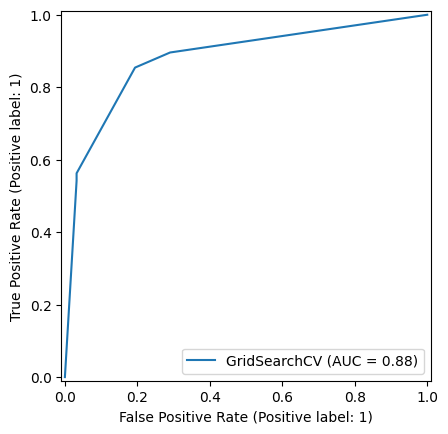

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Assuming you have fitted your model (estimator) and true labels (y)
y_pred = modelo_AC.predict_proba(X_test)[:, 1]  # Assuming binary classification

roc_curve = RocCurveDisplay.from_estimator(modelo_AC, X_test, Y_test)




plt.show()


### Ramdon

In [47]:
y_pred=modelo_RF.predict(X_test)
from sklearn.metrics import classification_report
accuracy_score(Y_test,y_pred)

0.9746835443037974

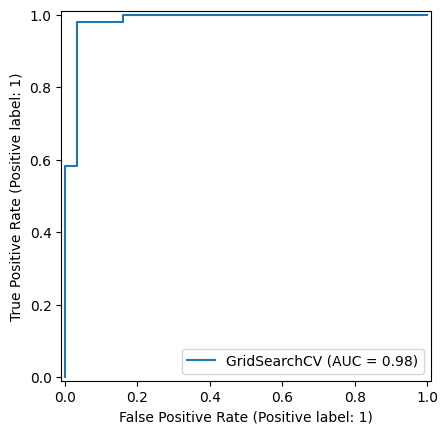

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Assuming you have fitted your model (estimator) and true labels (y)
y_pred = modelo_RF.predict_proba(X_test)[:, 1]  # Assuming binary classification

roc_curve = RocCurveDisplay.from_estimator(modelo_RF, X_test, Y_test)




plt.show()